# Copernicus Marine In-situ data

Copernicus Marine provides access to a lot of ocean observations through the [In Situ Thematic Centre](
https://marine.copernicus.eu/about/producers/insitu-tac), which consists of a global centre and six regional centers

* Arctic Ocean
* Baltic Sea
* Black Sea
* Iberia Biscay Ireland Seas
* Mediterranean Sea
* North-west Shelf


> The INS TAC provides integrated products for a core set of parameters (Temperature, Salinity, Current, Sea Level,Waves,Chlorophyll ,Oxygen ,Nutrients , Carbon) , for initialization, forcing, assimilation and validation of ocean numerical models. These products are used for forecasting, analysis and re-analysis of ocean physical and biogeochemical conditions, satellite validation and downstream applications that require NRT data


## Data access

To get an overview of what data is available you can visit the [CMEMS In Situ TAC Dashboard](http://www.marineinsitu.eu/dashboard/)

Data can also be downloaded from the web interface.

![](../images/cmems_insitu_dashboard.png)

(To download CMEMS data, you first need to create a user, in order to get a username and password.

Registering a new user can be [here](https://data.marine.copernicus.eu/register))


## Platform overview

In [13]:
import pandas as pd

cols = "platform_code,date_creation,date_update,wmo_platform_code,data_source,institution,institution_edmo_code,parameters,last_latitude_observation,last_longitude_observation,last_date_observation".split(",")

platforms = pd.read_csv("https://data-marineinsitu.ifremer.fr/glo_multiparameter_nrt/index_platform.txt", names=cols, header=None, comment="#")

In [14]:
platforms.head()

,platform_code,date_creation,date_update,wmo_platform_code,data_source,institution,institution_edmo_code,parameters,last_latitude_observation,last_longitude_observation,last_date_observation
0,00136,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,00136,GL_PR_XB_00136,Unknown institution,NaN,DEPH TEMP,32.015,158.862,2008-11-05T11:00:00Z
1,06SW,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,DCHO,GL_PR_XB_06SW,Germany (Unknown),NaN,DEPH TEMP,36.650,-1.750,2010-10-03T12:45:00Z
2,10004,2021-03-18T08:03:31Z,2021-12-02T01:12:38Z,10004,GL_PR_TX_10004,Germany (Unknown),NaN,DEPH TEMP,54.170,6.350,2014-04-20T18:44:00Z
3,10005,2021-03-18T08:03:31Z,2021-12-02T01:12:38Z,10005,GL_PR_TX_10005,Germany (Unknown),NaN,DEPH TEMP,54.000,8.110,1999-12-03T18:36:00Z
4,10007,2021-03-18T08:03:31Z,2022-05-22T20:36:12Z,10007,GL_PR_TX_10007,Germany (Unknown),NaN,DEPH TEMP,54.170,7.430,2014-04-20T18:41:00Z


The observed parameters for each platform is found in the parameters columns, but not in a [tidy](https://vita.had.co.nz/papers/tidy-data.pdf) format.
Let's fix that!

In [27]:
platforms['parameters'] = platforms.parameters.str.split()
platforms = platforms.explode("parameters")
platforms.head()

,platform_code,date_creation,date_update,wmo_platform_code,data_source,institution,institution_edmo_code,parameters,last_latitude_observation,last_longitude_observation,last_date_observation,pars
0,00136,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,00136,GL_PR_XB_00136,Unknown institution,NaN,DEPH,32.015,158.862,2008-11-05T11:00:00Z,"[DEPH, TEMP]"
0,00136,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,00136,GL_PR_XB_00136,Unknown institution,NaN,TEMP,32.015,158.862,2008-11-05T11:00:00Z,"[DEPH, TEMP]"
1,06SW,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,DCHO,GL_PR_XB_06SW,Germany (Unknown),NaN,DEPH,36.650,-1.750,2010-10-03T12:45:00Z,"[DEPH, TEMP]"
1,06SW,2021-03-10T10:04:08Z,2021-12-21T02:27:46Z,DCHO,GL_PR_XB_06SW,Germany (Unknown),NaN,TEMP,36.650,-1.750,2010-10-03T12:45:00Z,"[DEPH, TEMP]"
2,10004,2021-03-18T08:03:31Z,2021-12-02T01:12:38Z,10004,GL_PR_TX_10004,Germany (Unknown),NaN,DEPH,54.170,6.350,2014-04-20T18:44:00Z,"[DEPH, TEMP]"


There are many different variables ("parameters") available for download.

Here is a list of some popular parameter abbreviations.

In [49]:
platforms.groupby("parameters").platform_code.count().nlargest(30)

parameters
TEMP                   58179
DEPH                   39155
PSAL                   27866
PRES                   23386
PRES_ADJUSTED          17743
TEMP_ADJUSTED          17559
PSAL_ADJUSTED          17234
PRES_ADJUSTED_ERROR    14109
TEMP_ADJUSTED_ERROR    14100
PSAL_ADJUSTED_ERROR    13958
ATMS                   10774
ATPT                    5107
DOX1                    2933
ATMP                    2797
DOX2                    2037
NSCT                    2009
EWCT                    2007
PHOS                    1969
SLCA                    1496
DOX2_ADJUSTED           1478
PHPH                    1469
DRYT                    1415
DOX2_ADJUSTED_ERROR     1410
WSPD                    1378
NTRA                    1371
CPHL                    1364
CNDC                    1267
WDIR                    1209
VTPK                    1180
VHM0                    1174
Name: platform_code, dtype: int64

In [58]:
platforms.columns

Index(['platform_code', 'date_creation', 'date_update', 'wmo_platform_code',
       'data_source', 'institution', 'institution_edmo_code', 'parameters',
       'last_latitude_observation', 'last_longitude_observation',
       'last_date_observation', 'pars'],
      dtype='object')

In [62]:
wave_platforms = platforms[platforms.parameters == "VHM0"][["platform_code", "institution", "last_latitude_observation", "last_longitude_observation"]]

Let's try to filter this list to a specific area

In [79]:
wave_platforms[(wave_platforms.last_latitude_observation > 55) & 
               (wave_platforms.last_longitude_observation > 0) & 
               (wave_platforms.last_longitude_observation < 10)]

,platform_code,institution,last_latitude_observation,last_longitude_observation
45086,A121,Rijkswaterstaat Water Traffic and Environment,55.41663,3.81663
45088,A122,Rijkswaterstaat Water Traffic and Environment,55.41800,3.81700
45499,Butendiek,Fed. Maritime and Hydrographic Agency - Dept. ...,55.01670,7.78330
54520,FINO3,R and D centre Kiel University of Applied Scie...,55.19500,7.15833
54772,Fanoebugt,Danish Coastal Authority Ministry of Transport...,55.34600,8.23000
54787,Fjaltring,Danish Coastal Authority Ministry of Transport...,56.47500,8.04800
54943,Gullfaks-C,Norwegian Meteorological Institute,61.20420,2.26870
55086,HanstholmWR,Danish Coastal Authority Ministry of Transport...,57.13400,8.58300
55105,Heimdal,Norwegian Meteorological Institute,59.57420,2.22730
55129,HirtshalsWR,Danish Coastal Authority Ministry of Transport...,57.60000,9.96670


`Fanoebugt` seems like it could be relevant, let's try to download that data

In [82]:
import os

stn = 'Fanoebugt'
base_url = "https://data-marineinsitu.ifremer.fr/glo_multiparameter_nrt/history/MO/"

tac = "NO" # TODO how to get this?

filename = f"{tac}_TS_MO_{stn}.nc"

url = os.path.join(base_url,filename)
url


'https://data-marineinsitu.ifremer.fr/glo_multiparameter_nrt/history/MO/NO_TS_MO_Fanoebugt.nc'

In [91]:
from urllib import request

response = request.urlretrieve(url, filename)

In [87]:
import xarray as xr

ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:      (TIME: 71551, DEPTH: 1, LATITUDE: 71551, POSITION: 71551,
                  LONGITUDE: 71551)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2015-06-03T07:00:00 ... 2022-10-31T22:...
    DEPH         (TIME, DEPTH) float32 ...
  * LATITUDE     (LATITUDE) float32 55.35 55.35 55.35 ... 55.35 55.35 55.35
  * LONGITUDE    (LONGITUDE) float32 8.23 8.23 8.23 8.23 ... 8.23 8.23 8.23 8.23
Dimensions without coordinates: DEPTH, POSITION
Data variables: (12/21)
    TIME_QC      (TIME) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    VDIR         (TIME, DEPTH) float64 ...
    VDIR_QC      (TIME, DEPTH) float32 ...
    VDIR_DM      (TIME, DEPTH) object ...
    VAVH         (TIME, DEPTH) float64 ...
    ...           ...
    VTM02_QC     (TIME, DEPTH) float32 ...
    VTM02_DM     (TIME, DEPTH) object ...
    VTPK         (TIME, DEPTH) float64 ...
    VTPK_QC      (TIME, DEPTH) float32 ...
    VTPK_DM      (TIME, DEPTH) object ...
    POSITION_QC  (POSITION) float32 ...
Attributes: (12/46)
    platform_code:                  Fanoebugt
    platform_name:                  
    data_mode:                      M
    title:                          NWS - NRT in situ Observations
    summary:                        Oceanographic data from North West Shelf
    naming_authority:               Copernicus Marine In Situ
    ...                             ...
    doi:                            
    pi_name:                        
    qc_manual:                      OceanSITES User's Manual v1.2
    date_update:                    2022-11-01T16:16:13Z
    history:                        2022-11-01T16:16:13Z : Creation
    wmo_inst_type:

The dataset contains many different variables

In [110]:
ds.data_vars

Data variables:
    TIME_QC      (TIME) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    VDIR         (TIME, DEPTH) float64 ...
    VDIR_QC      (TIME, DEPTH) float32 ...
    VDIR_DM      (TIME, DEPTH) object ...
    VAVH         (TIME, DEPTH) float64 ...
    VAVH_QC      (TIME, DEPTH) float32 ...
    VAVH_DM      (TIME, DEPTH) object ...
    VHM0         (TIME, DEPTH) float64 ...
    VHM0_QC      (TIME, DEPTH) float32 ...
    VHM0_DM      (TIME, DEPTH) object ...
    VZMX         (TIME, DEPTH) float64 ...
    VZMX_QC      (TIME, DEPTH) float32 ...
    VZMX_DM      (TIME, DEPTH) object ...
    VTM02        (TIME, DEPTH) float64 ...
    VTM02_QC     (TIME, DEPTH) float32 ...
    VTM02_DM     (TIME, DEPTH) object ...
    VTPK         (TIME, DEPTH) float64 ...
    VTPK_QC      (TIME, DEPTH) float32 ...
    VTPK_DM      (TIME, DEPTH) object ...
    POSITION_QC  (POSITION) float32 ...

Each variable has a standard name ([CF convention](https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html))

In [114]:
ds.VHM0.standard_name

'sea_surface_wave_significant_height'

As well a long, friendly name

In [112]:
ds.VHM0.long_name

'Spectral significant wave height (Hm0)'

Each variable also has an associated QC flag

In [113]:
ds.VHM0_QC.long_name

'Spectral significant wave height (Hm0) quality flag'

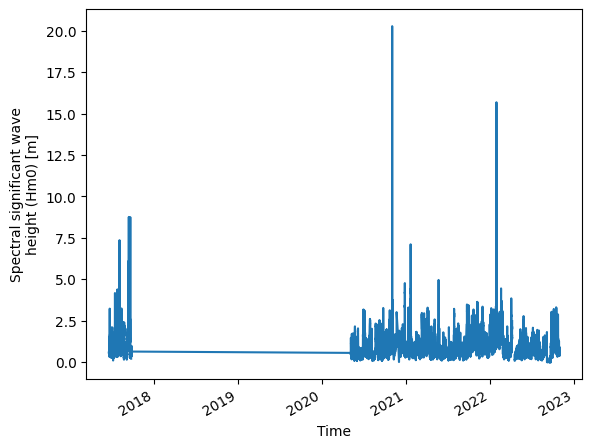

In [90]:
ds.VHM0.isel(DEPTH=0).plot()

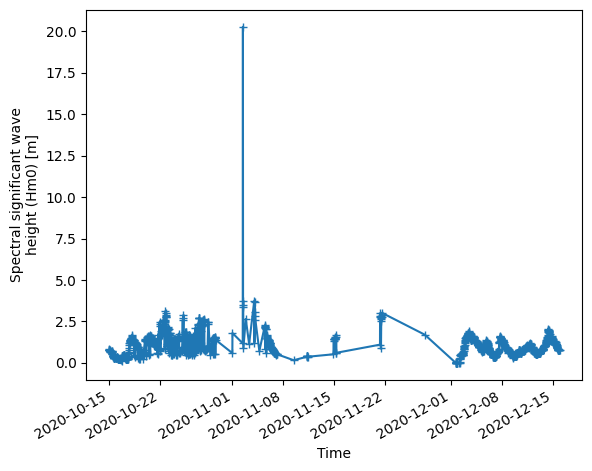

In [98]:
ds.VHM0.isel(DEPTH=0).sel(TIME=slice("2020-10-15","2020-12-15")).plot.line('+-')

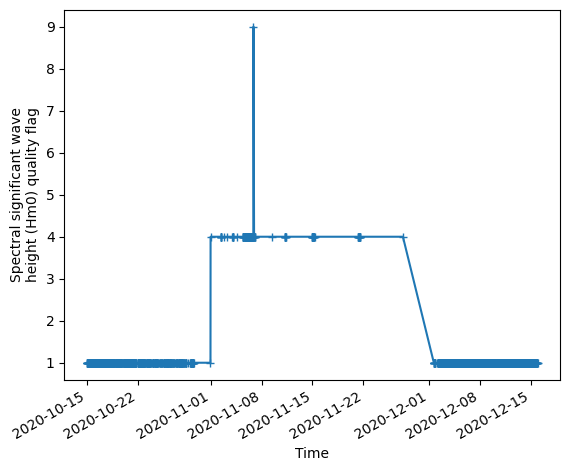

In [106]:
ds.VHM0_QC.isel(DEPTH=0).sel(TIME=slice("2020-10-15","2020-12-15")).plot.line('+-')

In [109]:
ds.isel(DEPTH=0).sel(TIME=slice("2020-11-01","2020-11-09"))[['VHM0','VHM0_QC']].to_dataframe()

,VHM0,VHM0_QC,DEPH
TIME,,,
2020-11-01 00:00:00,1.800000,4.0,0.0
2020-11-02 09:53:00,1.180000,4.0,0.0
2020-11-02 10:00:00,3.390000,4.0,0.0
2020-11-02 10:30:00,20.270001,4.0,0.0
2020-11-02 11:00:00,3.480000,4.0,0.0
...,...,...,...
2020-11-07 00:30:00,0.520000,4.0,0.0
2020-11-07 01:00:00,0.500000,4.0,0.0
2020-11-07 01:30:00,0.530000,4.0,0.0
